In [35]:
%%capture

## Importing Packages
import math
import nltk
import random
import pickle
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

## Basic File Paths
data_dir = "D:/nlp proj/final/en_US"
file_path = data_dir + "/en_US.twitter.txt"

## nltk settings
nltk.data.path.append(data_dir)
nltk.download('punkt')

## Opening the File in read mode ("r")
with open(file_path,"r",encoding="utf8") as f:
    data = f.read()


In [36]:
def preprocess_pipeline(data) -> 'list':

    # Split by newline character
    sentences = data.split('\n')
    
    # Remove leading and trailing spaces
    sentences = [s.strip() for s in sentences]
    
    # Drop Empty Sentences
    sentences = [s for s in sentences if len(s) > 0]
    
    # Empty List to hold Tokenized Sentences
    tokenized = []
    
    # Iterate through sentences
    for sentence in sentences:
        
        # Convert to lowercase
        sentence = sentence.lower()
        
        # Convert to a list of words
        token = nltk.word_tokenize(sentence)
        
        # Append to list
        tokenized.append(token)
        
    return tokenized


## Pass our data to this function    
tokenized_sentences = preprocess_pipeline(data)

In [37]:
!pip install WordCloud

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

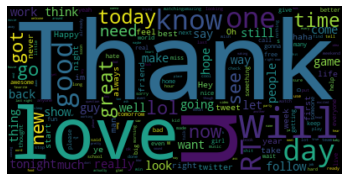

In [39]:
import matplotlib.pyplot as plt
# Start with one review:
text = data[:1000000]


# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

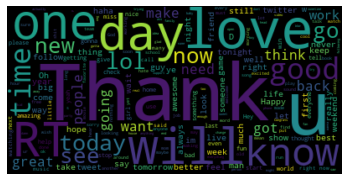

In [40]:
import matplotlib.pyplot as plt
# Start with one review:
text = data[1000000:2000000]


# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

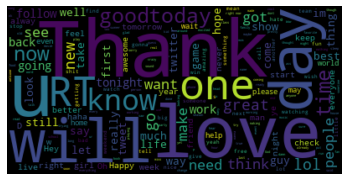

In [41]:
import matplotlib.pyplot as plt
# Start with one review:
text = data[2000000:3000000]


# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

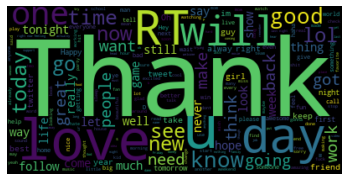

In [42]:
import matplotlib.pyplot as plt
# Start with one review:
text = data[3000000:4000000]


# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [43]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_sentences[1])
print(fdist)

<FreqDist with 20 samples and 24 outcomes>


In [44]:
fdist.most_common(2)

[('you', 3), ("'ll", 2)]

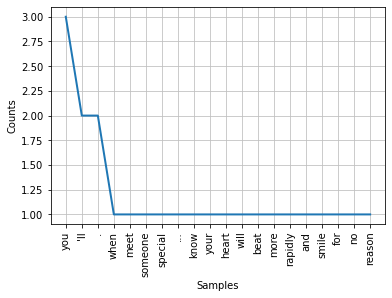

In [45]:
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

In [46]:
import nltk
nltk.download('stopwords')

True

In [47]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{'only', 'hasn', 've', 'such', 'did', 'until', 'can', 'once', 'i', 'has', 'for', 'how', 'the', 'were', 'so', 'y', 'yourselves', 'o', "hasn't", "hadn't", 'he', 'shan', 'what', "you've", 'in', 'some', 'll', 'wasn', 'needn', 'here', 'my', 'through', 'or', 'each', 'just', 'same', 'before', 'again', 'which', 'now', 'have', 'more', 'any', 'then', "haven't", "wasn't", 'am', 'off', 's', 'whom', 'that', 'most', 'they', 'a', 'herself', "weren't", 'weren', "wouldn't", 'other', 'be', 'me', 'no', "aren't", 'with', 'mustn', 'doing', 'ain', 'doesn', 'not', "doesn't", 'too', 'than', 'haven', 'you', 'ourselves', 'below', "don't", 'these', 'isn', 'is', 'from', 'who', "won't", 'their', 'between', 'out', 'into', 'shouldn', "shouldn't", 'itself', 'because', 'about', "needn't", 'against', 'above', 'both', 'those', 'been', 'if', 'don', 'having', 'down', 'own', 'himself', "you'd", 'should', 'and', 'of', 'under', "mustn't", 'wouldn', 'during', 'won', "couldn't", 'didn', 'its', 'by', "mightn't", 'over', "isn't"

In [48]:
tokenized_sentences[1]

['when',
 'you',
 'meet',
 'someone',
 'special',
 '...',
 'you',
 "'ll",
 'know',
 '.',
 'your',
 'heart',
 'will',
 'beat',
 'more',
 'rapidly',
 'and',
 'you',
 "'ll",
 'smile',
 'for',
 'no',
 'reason',
 '.']

In [49]:
import nltk
nltk.download('averaged_perceptron_tagger')
  

True

In [50]:
nltk.pos_tag(tokenized_sentences[1])

[('when', 'WRB'),
 ('you', 'PRP'),
 ('meet', 'VBP'),
 ('someone', 'NN'),
 ('special', 'JJ'),
 ('...', ':'),
 ('you', 'PRP'),
 ("'ll", 'MD'),
 ('know', 'VB'),
 ('.', '.'),
 ('your', 'PRP$'),
 ('heart', 'NN'),
 ('will', 'MD'),
 ('beat', 'VB'),
 ('more', 'RBR'),
 ('rapidly', 'RB'),
 ('and', 'CC'),
 ('you', 'PRP'),
 ("'ll", 'MD'),
 ('smile', 'VB'),
 ('for', 'IN'),
 ('no', 'DT'),
 ('reason', 'NN'),
 ('.', '.')]

In [51]:
nltk.pos_tag(tokenized_sentences[2])

[('they', 'PRP'),
 ("'ve", 'VBP'),
 ('decided', 'VBD'),
 ('its', 'PRP$'),
 ('more', 'RBR'),
 ('fun', 'JJ'),
 ('if', 'IN'),
 ('i', 'NNS'),
 ('do', 'VBP'),
 ("n't", 'RB'),
 ('.', '.')]

In [52]:
nltk.pos_tag(tokenized_sentences[3])

[('so', 'RB'),
 ('tired', 'JJ'),
 ('d', 'NN'),
 (';', ':'),
 ('played', 'VBN'),
 ('lazer', 'NN'),
 ('tag', 'NN'),
 ('&', 'CC'),
 ('ran', 'VBD'),
 ('a', 'DT'),
 ('lot', 'NN'),
 ('d', 'NN'),
 (';', ':'),
 ('ughh', 'JJ'),
 ('going', 'VBG'),
 ('to', 'TO'),
 ('sleep', 'VB'),
 ('like', 'IN'),
 ('in', 'IN'),
 ('5', 'CD'),
 ('minutes', 'NNS'),
 (';', ':'),
 (')', ')')]

In [53]:
tokenized_sentences[:111]
    
    

[['how',
  'are',
  'you',
  '?',
  'btw',
  'thanks',
  'for',
  'the',
  'rt',
  '.',
  'you',
  'gon',
  'na',
  'be',
  'in',
  'dc',
  'anytime',
  'soon',
  '?',
  'love',
  'to',
  'see',
  'you',
  '.',
  'been',
  'way',
  ',',
  'way',
  'too',
  'long',
  '.'],
 ['when',
  'you',
  'meet',
  'someone',
  'special',
  '...',
  'you',
  "'ll",
  'know',
  '.',
  'your',
  'heart',
  'will',
  'beat',
  'more',
  'rapidly',
  'and',
  'you',
  "'ll",
  'smile',
  'for',
  'no',
  'reason',
  '.'],
 ['they', "'ve", 'decided', 'its', 'more', 'fun', 'if', 'i', 'do', "n't", '.'],
 ['so',
  'tired',
  'd',
  ';',
  'played',
  'lazer',
  'tag',
  '&',
  'ran',
  'a',
  'lot',
  'd',
  ';',
  'ughh',
  'going',
  'to',
  'sleep',
  'like',
  'in',
  '5',
  'minutes',
  ';',
  ')'],
 ['words',
  'from',
  'a',
  'complete',
  'stranger',
  '!',
  'made',
  'my',
  'birthday',
  'even',
  'better',
  ':',
  ')'],
 ['first',
  'cubs',
  'game',
  'ever',
  '!',
  'wrigley',
  'field',
 

In [54]:
## Obtain Train and Test Split 
train, test = train_test_split(tokenized_sentences, test_size=0.2, random_state=42)

## Obtain Train and Validation Split 
train, val = train_test_split(train, test_size=0.25, random_state=42)

In [55]:
def count_the_words(sentences) -> 'dict':
    
  # Creating a Dictionary of counts
  word_counts = {}

  # Iterating over sentences
  for sentence in sentences:
    
    # Iterating over Tokens
    for token in sentence:
    
      # Add count for new word
      if token not in word_counts.keys():
        word_counts[token] = 1
        
      # Increase count by one
      else:
        word_counts[token] += 1
        
  return word_counts

In [56]:
def handling_oov(tokenized_sentences, count_threshold) -> 'list':

  # Empty list for closed vocabulary
  closed_vocabulary = []

  # Obtain frequency dictionary using previously defined function
  words_count = count_the_words(tokenized_sentences)
    
  # Iterate over words and counts 
  for word, count in words_count.items():
    
    # Append if it's more(or equal) to the threshold 
    if count >= count_threshold :
      closed_vocabulary.append(word)

  return closed_vocabulary

In [57]:
def unk_tokenize(tokenized_sentences, vocabulary, unknown_token = "<unk>") -> 'list':

  # Convert Vocabulary into a set
  vocabulary = set(vocabulary)

  # Create empty list for sentences
  new_tokenized_sentences = []
  
  # Iterate over sentences
  for sentence in tokenized_sentences:

    # Iterate over sentence and add <unk> 
    # if the token is absent from the vocabulary
    new_sentence = []
    for token in sentence:
      if token in vocabulary:
        new_sentence.append(token)
      else:
        new_sentence.append(unknown_token)
    
    # Append sentece to the new list
    new_tokenized_sentences.append(new_sentence)

  return new_tokenized_sentences

In [58]:
def cleansing(train_data, test_data, count_threshold):
    
  # Get closed Vocabulary
  vocabulary = handling_oov(train_data, count_threshold)
    
  # Updated Training Dataset
  new_train_data = unk_tokenize(train_data, vocabulary)
    
  # Updated Test Dataset
  new_test_data = unk_tokenize(test_data, vocabulary)

  return new_train_data, new_test_data, vocabulary

In [59]:
min_freq = 6
final_train, final_test, vocabulary = cleansing(train, test, min_freq)

In [60]:
def count_n_grams(data, n, start_token = "<s>", end_token = "<e>") -> 'dict':

  # Empty dict for n-grams
  n_grams = {}
 
  # Iterate over all sentences in the dataset
  for sentence in data:
        
    # Append n start tokens and a single end token to the sentence
    sentence = [start_token]*n + sentence + [end_token]
    
    # Convert the sentence into a tuple
    sentence = tuple(sentence)

    # Temp var to store length from start of n-gram to end
    m = len(sentence) if n==1 else len(sentence)-1
    
    # Iterate over this length
    for i in range(m):
        
      # Get the n-gram
      n_gram = sentence[i:i+n]
    
      # Add the count of n-gram as value to our dictionary
      # IF n-gram is already present
      if n_gram in n_grams.keys():
        n_grams[n_gram] += 1
      # Add n-gram count
      else:
        n_grams[n_gram] = 1
        
  return n_grams

In [61]:
def prob_for_single_word(word, previous_n_gram, n_gram_counts, nplus1_gram_counts, vocabulary_size, k = 1.0) -> 'float':

  # Convert the previous_n_gram into a tuple 
  previous_n_gram = tuple(previous_n_gram)
    
  # Calculating the count, if exists from our freq dictionary otherwise zero
  previous_n_gram_count = n_gram_counts[previous_n_gram] if previous_n_gram in n_gram_counts else 0
  
  # The Denominator
  denom = previous_n_gram_count + k * vocabulary_size

  # previous n-gram plus the current word as a tuple
  nplus1_gram = previous_n_gram + (word,)

  # Calculating the nplus1 count, if exists from our freq dictionary otherwise zero 
  nplus1_gram_count = nplus1_gram_counts[nplus1_gram] if nplus1_gram in nplus1_gram_counts else 0

  # Numerator
  num = nplus1_gram_count + k

  # Final Fraction
  prob = num / denom
  return prob

In [62]:
def probs(previous_n_gram, n_gram_counts, nplus1_gram_counts, vocabulary, k=1.0) -> 'dict':

  # Convert to Tuple
  previous_n_gram = tuple(previous_n_gram)

  # Add end and unknown tokens to the vocabulary
  vocabulary = vocabulary + ["<e>", "<unk>"]

  # Calculate the size of the vocabulary
  vocabulary_size = len(vocabulary)

  # Empty dict for probabilites
  probabilities = {}

  # Iterate over words 
  for word in vocabulary:
    
    # Calculate probability
    probability = prob_for_single_word(word, previous_n_gram, 
                                           n_gram_counts, nplus1_gram_counts, 
                                           vocabulary_size, k=k)
    # Create mapping: word -> probability
    probabilities[word] = probability

  return probabilities

In [63]:
def auto_complete(previous_tokens, n_gram_counts, nplus1_gram_counts, vocabulary, k=1.0, start_with=None):

    
    # length of previous words
    n = len(list(n_gram_counts.keys())[0]) 
    
    # most recent 'n' words
    previous_n_gram = previous_tokens[-n:]
    
    # Calculate probabilty for all words
    probabilities = probs(previous_n_gram,n_gram_counts, nplus1_gram_counts,vocabulary, k=k)

    # Intialize the suggestion and max probability
    suggestion = None
    max_prob = 0

    # Iterate over all words and probabilites, returning the max.
    # We also add a check if the start_with parameter is provided
    for word, prob in probabilities.items():
        
        if start_with != None: 
            
            if not word.startswith(start_with):
                continue 

        if prob > max_prob: 

            suggestion = word
            max_prob = prob

    return suggestion, max_prob

In [64]:
def get_suggestions(previous_tokens, n_gram_counts_list, vocabulary, k=1.0, start_with=None):

    # See how many models we have
    count = len(n_gram_counts_list)
    
    # Empty list for suggestions
    suggestions = []
    
    # IMP: Earlier "-1"
    
    # Loop over counts
    for i in range(count-1):
        
        # get n and nplus1 counts
        n_gram_counts = n_gram_counts_list[i]
        nplus1_gram_counts = n_gram_counts_list[i+1]
        
        # get suggestions 
        suggestion = auto_complete(previous_tokens, n_gram_counts,
                                    nplus1_gram_counts, vocabulary,
                                    k=k, start_with=start_with)
        # Append to list
        suggestions.append(suggestion)
        
    return suggestions

In [65]:
n_gram_counts_list = []
for n in range(1, 6):
    n_model_counts = count_n_grams(final_train, n)
    n_gram_counts_list.append(n_model_counts)

In [66]:
users_input= input ("write something..")
previous_tokens = users_input.split()
suggestion = get_suggestions(previous_tokens, n_gram_counts_list, vocabulary, k=1.0)
display(suggestion)

write something..i am going 


[('to', 0.24051625283751843),
 ('to', 0.011806845317060229),
 ('to', 0.011248316546216735),
 ('<e>', 7.686838211272748e-05)]

In [ ]:
# Storing to file
with open("en_counts.txt", 'wb',encoding="utf8") as f:
    pickle.dump(n_gram_counts_list, f)

In [31]:
# Storing to file
with open("vocab.txt", 'wb',encoding="utf8") as f:
    pickle.dump(vocabulary, f)

In [32]:
with open("en_counts.txt", 'rb',encoding="utf8") as f:
    mp=pickle.load(f)

In [ ]:
with open("vocab.txt", 'rb',encoding="utf8") as f:
    vp=pickle.load(f)

In [78]:
print("unigram count:" , len(n_gram_counts_list[0]))
print("bigram count:", len(n_gram_counts_list[1]))
print("trigram count:", len(n_gram_counts_list[2]))
print("quadgram count:", len(n_gram_counts_list[3]))
print("quintgram count:", len(n_gram_counts_list[4]))

unigram count: 52038
bigram count: 2888175
trigram count: 9857607
quadgram count: 15717278
quintgram count: 19120337
